In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:\Classes\CSCE320\Project\Crimes_-_2001_to_Present.csv")
data.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
df = data[data['Year'] == 2019]
df = df[df['X Coordinate'].notna()]
df = df[df['Y Coordinate'].notna()]

coords = df[['X Coordinate', 'Y Coordinate']].copy()


coords = coords[coords['X Coordinate'] > 10]
coords = coords[coords['Y Coordinate'] > 10]


coords.head()

,X Coordinate,Y Coordinate
60280,1100374.0,1943906.0
62198,1174723.0,1900866.0
62538,1182276.0,1879784.0
62570,1163827.0,1949311.0
62571,1182227.0,1879766.0


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 76).fit(coords)
centroids = kmeans.cluster_centers_

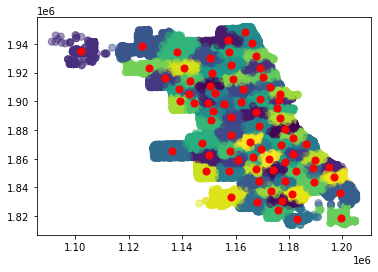

In [29]:
import matplotlib.pyplot as plt

plt.scatter(coords['X Coordinate'], coords['Y Coordinate'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [36]:
from collections import Counter
clusters = kmeans.labels_

print(Counter(clusters).keys())
Counter(clusters).values()

dict_keys([10, 9, 0, 37, 20, 48, 15, 31, 1, 34, 61, 51, 8, 65, 49, 55, 24, 3, 7, 72, 16, 70, 19, 23, 33, 13, 64, 32, 56, 14, 36, 73, 62, 54, 41, 60, 25, 66, 43, 2, 21, 68, 26, 67, 53, 30, 47, 40, 5, 39, 44, 46, 4, 12, 50, 42, 63, 69, 52, 17, 29, 6, 45, 22, 38, 75, 74, 59, 35, 27, 28, 71, 11, 57, 18, 58])


dict_values([1265, 9294, 3806, 3846, 1614, 3927, 3228, 3356, 3728, 1981, 3742, 2774, 4262, 4140, 2177, 5166, 4985, 4374, 5337, 2803, 5292, 3178, 3082, 4451, 5873, 3463, 9099, 1436, 2628, 4397, 6454, 3179, 3351, 3355, 3268, 3954, 2730, 2651, 3902, 3107, 3495, 4571, 1474, 4819, 4597, 2219, 2486, 4026, 2877, 3471, 3204, 2293, 2747, 2487, 3630, 3253, 2505, 1412, 4005, 2686, 3468, 1886, 3990, 1807, 2124, 4022, 3588, 1290, 2853, 2196, 1426, 874, 4905, 4022, 3292, 499])

array([10.,  9.,  0., ..., 36.,  4.,  4.])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y= df['Arrest']
X= df[['Community Area','Ward', 'District', 'Beat']]


clf = RandomForestClassifier(max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

NameError: name 'train' is not defined

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
pt = pd.DataFrame(df['Primary Type'])
ptv = vectorizer.fit_transform(pt)

ptv = pd.DataFrame(ptv.toarray())

X.append(ptv)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5, random_state=0)

rf2 = RandomForestClassifier(max_depth = 10, random_state=0)

rf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10, random_state=0)

In [28]:
clf.score(X_train,y_train)

0.7314529066331219

In [29]:
clf.score(X_test,y_test)

0.7315521056365367

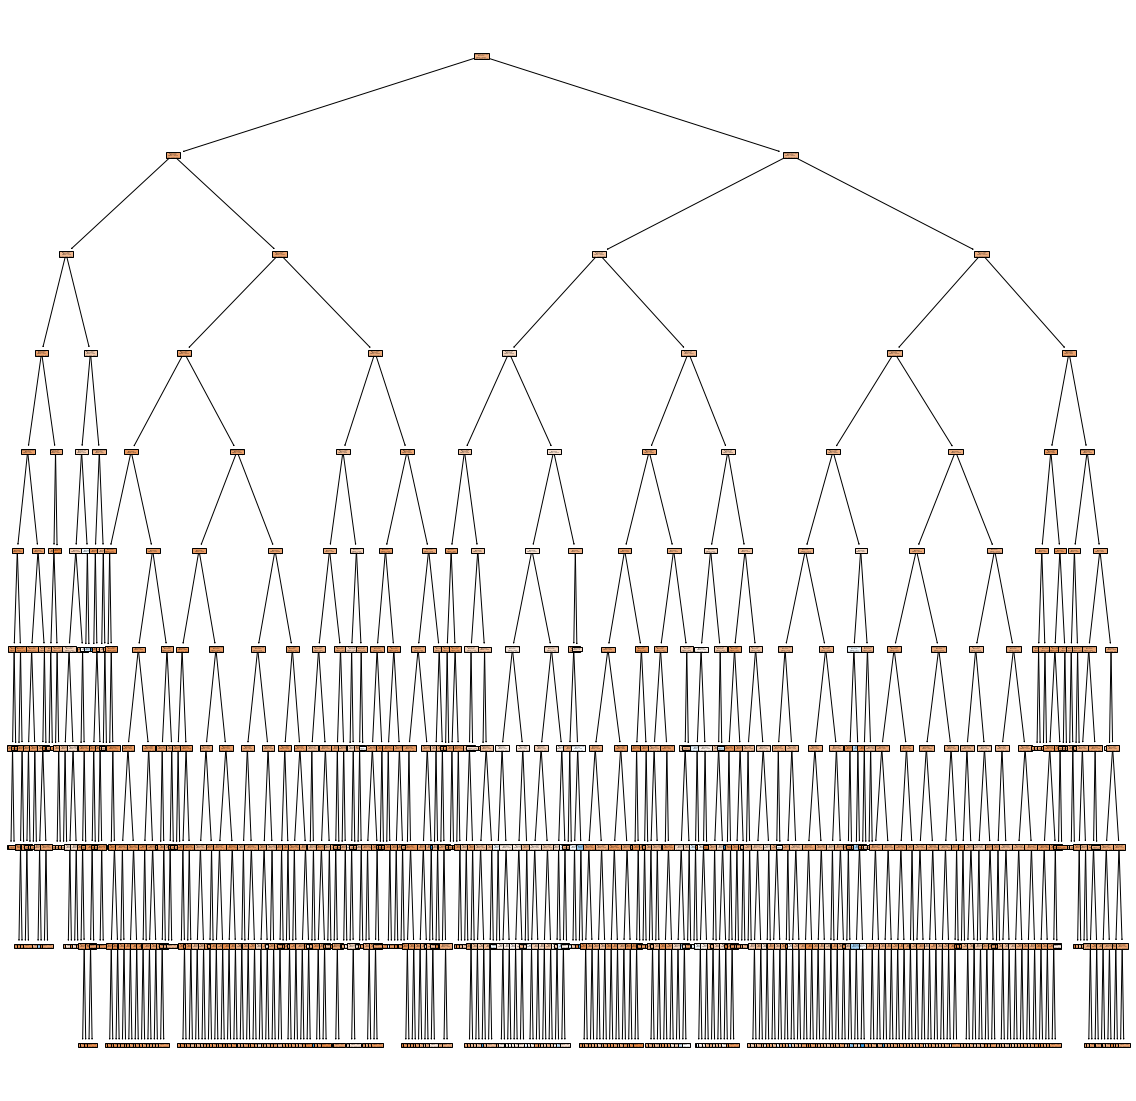

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt

fn=['Community Area','Ward', 'District', 'Beat']
cn= ['Arrest']

len(clf.estimators_)

plt.figure(figsize=(20,20)) 
_ = tree.plot_tree(clf.estimators_[0], feature_names=X_train.columns, filled=True)

fig.savefig('test.png')
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(clf.estimators_,
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);

In [62]:
# print(clf.feature_importances_)
# print(rf2.feature_importances_)

rf2.score(X_train,y_train)

0.7314529066331219

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',lowercase=True,max_df=.95,max_features=1000)


ptv = vectorizer.fit_transform(df['Primary Type'])

ptv

<6537737x46 sparse matrix of type '<class 'numpy.int64'>'
	with 8730166 stored elements in Compressed Sparse Row format>

In [55]:
# vectorizer.get_feature_names()

predict_data = data[['Primary Type','Year','Community Area']]
predict_test = predict_data


predict_data = predict_data[predict_data['Year']<2019]
predict_data = predict_data[predict_data['Year']>2014]

predict_test = predict_test[predict_test['Year'] == 2019]

dummies = pd.get_dummies(predict_data['Primary Type'])
predict_data = pd.concat([predict_data,dummies],axis=1)

dummies = pd.get_dummies(predict_test['Primary Type'])
predict_test = pd.concat([predict_test,dummies],axis=1)

predict_data = predict_data.drop(columns=['Primary Type'])

predict_test = predict_test.drop(columns=['Primary Type'])


predict_test.head()

,Year,Community Area,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
56643,2019,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59616,2019,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60086,2019,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60111,2019,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60117,2019,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np

kf = KFold(n_splits=10,random_state=0,shuffle=True)

lr = LinearRegression()
X = np.array(predict_data.loc[:, predict_data.columns != 'Community Area'])
y = np.array(predict_data.loc[:, 'Community Area'])


test_mae = []
test_mse = []
test_r2 = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train,y_train)
    y_hat_test = lr.predict(X_test)
    
    test_mae.append(metrics.mean_absolute_error(y_test,y_hat_test))
    test_mse.append(metrics.mean_squared_error(y_test,y_hat_test))
    test_r2.append(metrics.r2_score(y_test,y_hat_test))
    

print("Mean absolute error: ", np.average(test_mae), " Mean squared error: ", np.average(test_mse), "R^2: ", np.average(test_r2))


Mean absolute error:  17.995862914633946  Mean squared error:  448.86981676537414 R^2:  0.021275027342443333


In [4]:
df = data[data['Year'] == 2018]
df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]

latlon = df[['X Coordinate', 'Y Coordinate']].copy()



latlon.shape

(263437, 2)

In [6]:
##from https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = []

kmax = 15

for k in range(3,kmax+1):
    kmeans = KMeans(n_clusters = k).fit(latlon)
    labels = kmeans.labels_
    sil.append(silhouette_score(latlon, labels, metric = 'euclidean'))

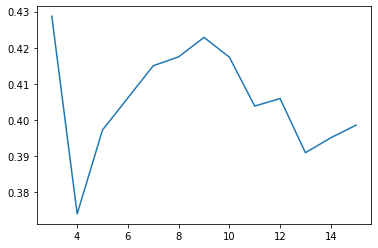

In [15]:
import matplotlib.pyplot as plt

val = []

for k in range(3,kmax+1):
    val.append(k)


plt.plot(val,sil)
plt.show()